<h2 align="center">(San Francisco Bay "Ford GoBike" system)</h2>
<h3 align="center">By (Richard Achiak)</h3>

## Investigation Overview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2019. 
In this investigation, I looked at the characteristics of users based on time of the day and day of the week in which most trips are done, how long was the average trip and find out if these results depend on a user type of this services (Customer and Substcribers) as well as members gender.


## Dataset Overview
After the dataset was assesed, it was noticed that the dataset contains 183,412 rows and 16 columns.

Wth the following variables;
- Trip Duration (seconds)

- Start Time and Date

- End Time and Date

- Start Station ID

- Start Station Name

- Start Station Latitude

- Start Station Longitude

- End Station ID

- End Station Name

- End Station Latitude

- End Station Longitude

- Bike ID

- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

- Member birth year

- Member gender

- Bike share for all trips

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2019_fordgobike_tripdata.csv')

In [3]:
# convert trip duration in seconds to minutes
df['duration_min'] = df['duration_sec'] / 60
# drop the 'duration_sec" column
df.drop('duration_sec' , axis = 1 , inplace = True)

## Percentage by user type
The following plot is looking at the user composition of the ford gobike system, they were categorize as customers and subscribers.
- As it is seen from the followin chart, most trips representing 90.5% were taken by subscribers with the remaining 9.5% being just casual riders. This shows how subscribers are making efficient use of thier subscription.

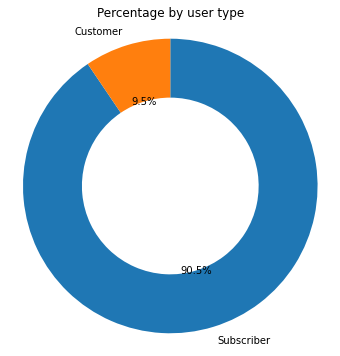

In [4]:
# Get the percentage count by user types
users = (df['user_type'].value_counts()/df['user_type'].count())*100

plt.figure(figsize=[12, 6])
plt.pie(users, labels = users.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Percentage by user type', fontsize=12)
plt.axis('square');

## Percentages of trips made in terms of time of the day
The following pie chart seeks to know the percentage of users who use the ford gobike system at various times, this was put into three categories morning, afternoon and evening.
- It was that most trips were done at morning (00:00 - 11:59 hours) representing 38.5%, followed closely by afternoon (12:00 - 17:59 hours) representing 38.3%. Night had 23.2% of all users which is reasonable.

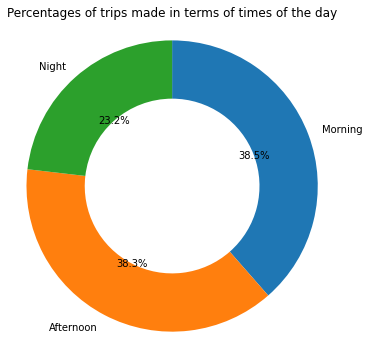

In [5]:
# Get the percentage count of trips made in terms of times of the day
time_of_day = (df['time_of_day'].value_counts()/df['time_of_day'].count())*100

plt.figure(figsize=[12, 6])
plt.pie(time_of_day, labels = time_of_day.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Percentages of trips made in terms of times of the day', fontsize=12)
plt.axis('square');

## Total count of users on each day of the week
The following chart shows the number of users of the ford gobike system for each day of the week. From monday to sunday.
- Most trip were done on midweek which is Thursday as was observed, this was followed by Tuesday and wednesday respectively. Weekends seem the list patronage of this service.

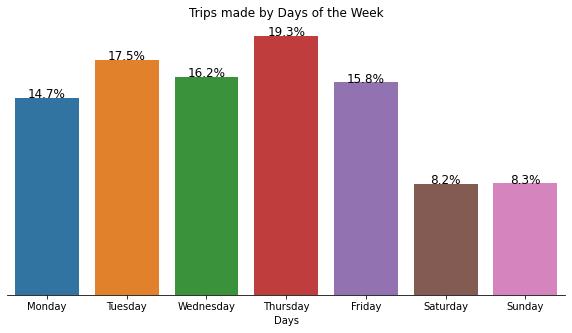

In [6]:

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[10, 5])
ax = sns.countplot(data = df, x = 'day_of_week', order=weekday)

n_points = df.shape[0]
user_counts = df['day_of_week'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', fontsize=12)


plt.title('Trips made by Days of the Week')
plt.xlabel('Days')

# Remove borderline features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')

plt.show()

## Percentage count of each Age group
Ages were put into groups of 8 classes, this basically looks at the age group that patronize the gobike services more.
- It was found that, mojority of the gobike users were between the ages of 21 to 40 years respectively as these age groups constitute almost 80% of all users.

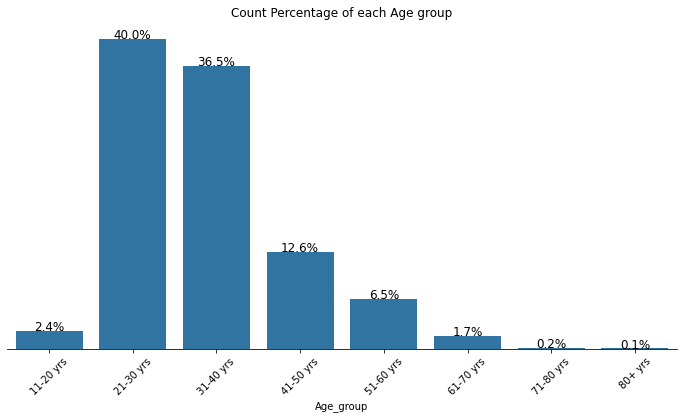

In [7]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]
plt.figure(figsize=[12, 6])

# Plot the age groups on a Horizontal bar chart
Age = df['Age_group'].value_counts().index
ax = sns.countplot(data=df.sort_values(['Age_group']), x='Age_group', color=base_color);

n_points = df.shape[0]
user_counts = df['Age_group'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center',fontsize=12)

plt.title('Count Percentage of each Age group')
# Remove borderline features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=45);


## Percentage by user gender
Of male, female and other as stated in the dataset, which of these gender patronize the services of ford gobike system? 
- Male riders were more than 3 times that of female riders as seen in the plot following, males represent 74.6% of the trips made entire period and females represent only 23.3% while other had a share of 2.1%.

<Figure size 864x432 with 0 Axes>

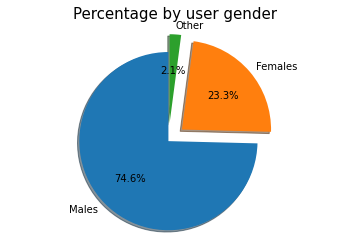

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Males', 'Females', 'Other'
sizes = [74.59, 23.32, 2.08]
explode = (0, 0.2, 0.2)  # only "explode" the 2nd and 3rd slice (i.e. 'female' and 'others')

plt.figure(figsize=[12, 6]);
fig1, ax1 = plt.subplots();
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage by user gender', fontsize=15);
plt.show();


## Age distribution among member gender as well as among user type
I also seek to find the distribution of age among variables such as member and user type.
- All member gender having almost the same average age and containing a number of outliers.
- The same average age for both subscribers and customers



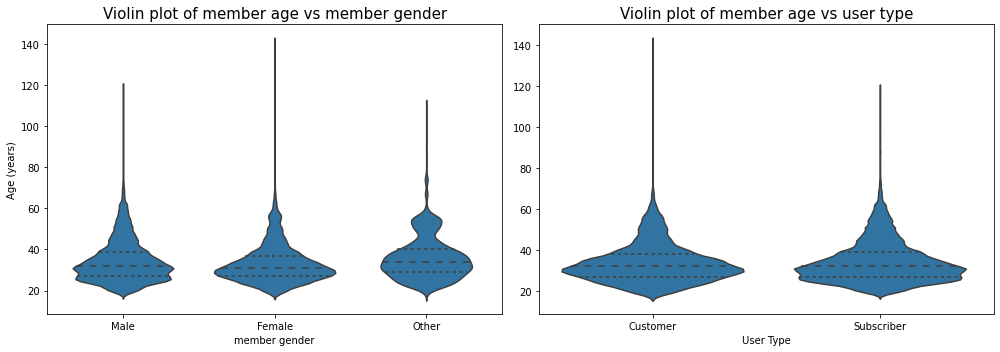

In [9]:
plt.figure(figsize = [14, 5],tight_layout=True)

#on the left - violin plot for member age - member gender distribution
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='member_gender', y='member_age', color = base_color, inner = 'quartile', order=['Male','Female','Other']);
plt.title('Violin plot of member age vs member gender', fontsize=15)
plt.xlabel('member gender');
plt.ylabel('Age (years)');

#on the right - violin plot of member age - user type distribution
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='user_type', y='member_age', color = base_color, inner = 'quartile');
plt.title('Violin plot of member age vs user type', fontsize=15);
plt.xlabel('User Type');
plt.ylabel('');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert gobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook gobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 433090 bytes to gobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/gobike_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not fou

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


<h1 align='center'>End of Presentation</h1>
<h2 align='center'>Thank You</h2>